In [162]:
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [175]:
master = pd.read_csv("data_proc/games_basic_master.csv")
box_scores = pd.read_csv("data_proc/games_boxscores_master.csv")
df = pd.read_csv('data_proc/games_wp_master.csv')



master = pd.merge(master, box_scores, on='GAME_ID')
master = pd.merge(master, df, on='GAME_ID')

master["SCORE_DIFF"] = master["TEAM1_SCORE_x"] - master["TEAM2_SCORE_x"]
master["HOME_PROB"] = 1.0 - master["away_prob_x"]


master.dropna(inplace=True)

display(master)

,GAME_ID,SBR_GAME_ID_x,DATE_x,TEAM1_ID_x,TEAM2_ID_x,TEAM1_SCORE_x,TEAM2_SCORE_x,WINNER_x,away_prob_x,away_spread_x,...,TEAM1_50wp,TEAM1_75wp,TEAM1_100wp,TEAM2_10wp,TEAM2_25wp,TEAM2_50wp,TEAM2_75wp,TEAM2_100wp,SCORE_DIFF,HOME_PROB
0,21600885,20170227_nba_Atlanta_Boston,20170227.0,1610612737,1610612738,114.0,98.0,1,0.392157,4.5,...,0.50,0.560000,0.57,0.5,0.48,0.50,0.560000,0.57,16.0,0.607843
1,21900278,20191129_nba_Chicago_Portland,20191129.0,1610612741,1610612757,103.0,107.0,2,0.277778,7.0,...,0.24,0.280000,0.32,0.2,0.24,0.24,0.280000,0.32,-4.0,0.722222
3,22100624,20220112_nba_Cleveland_Utah,20220112.0,1610612739,1610612762,111.0,91.0,1,0.363636,5.5,...,0.48,0.440000,0.39,0.6,0.68,0.48,0.440000,0.39,20.0,0.636364
4,22000156,20210111_nba_Indiana_Sacramento,20210111.0,1610612754,1610612758,122.0,127.0,2,0.622642,-3.5,...,0.40,0.493333,0.50,0.2,0.36,0.40,0.493333,0.50,-5.0,0.377358
6,21700891,20180224_nba_L.A. Lakers_Sacramento,20180224.0,1610612747,1610612758,113.0,108.0,1,0.555556,-1.5,...,0.50,0.493333,0.49,0.5,0.48,0.50,0.493333,0.49,5.0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,21701228,20180411_nba_L.A. Lakers_L.A. Clippers,20180411.0,1610612747,1610612746,115.0,100.0,1,0.465116,2.5,...,0.46,0.506667,0.51,0.3,0.56,0.46,0.506667,0.51,15.0,0.534884
9644,21800513,20181227_nba_New York_Milwaukee,20181227.0,1610612752,1610612749,96.0,112.0,2,0.106724,14.0,...,0.50,0.493333,0.48,0.3,0.40,0.50,0.493333,0.48,-16.0,0.893276
9645,21700136,20171105_nba_Atlanta_Cleveland,20171105.0,1610612737,1610612739,117.0,115.0,1,0.140056,11.0,...,0.40,0.440000,0.48,0.2,0.36,0.40,0.440000,0.48,2.0,0.859944
9647,21600644,20170120_nba_Sacramento_Memphis,20170120.0,1610612758,1610612763,91.0,107.0,2,0.256410,8.0,...,0.58,0.613333,0.57,0.5,0.56,0.58,0.613333,0.57,-16.0,0.743590


# Basic LinRegs


##### Score Diff w/ Betting Line

In [172]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sb

def basicLinearRegression(X_input,y_input):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=.2)

    print(f"X: {X_input.columns.tolist()}")
    print(f"y: {y_input.columns.tolist()}")
    
    reg = LinearRegression().fit(X_train, y_train)
    
    y_pred = reg.predict(X_test)

    # The coefficients
    print("Coefficients: \n", reg.coef_)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.5f" % mse)
    #RMSE:
    print(f'Root Mean Squared Error: (RMSE): {np.sqrt(mse)}')
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.5f" % r2_score(y_test, y_pred))

    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    plt.figure(figsize=(8, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()
    


## Regressions to Determine Score Differential

X: ['TEAM2_REB', 'TEAM2_AST', 'TEAM2_STL']
y: ['SCORE_DIFF']
Coefficients: 
 [[-0.76566386 -1.07944432 -0.85658866]]
Mean squared error: 133.29108
Root Mean Squared Error: (RMSE): 11.545175512734396
Coefficient of determination: 0.28487


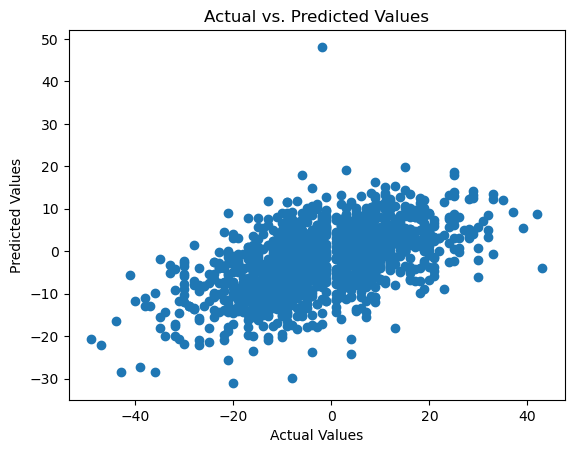

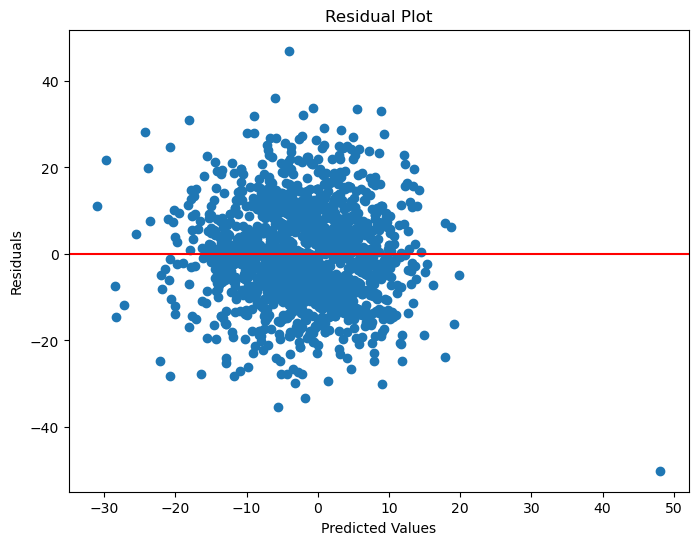

X: ['TEAM2_REB', 'TEAM2_AST', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_AST', 'TEAM1_STL', 'TEAM1_FT_PCT', 'TEAM2_FT_PCT']
y: ['SCORE_DIFF']
Coefficients: 
 [[-0.6617712  -1.00347031 -0.94536479  0.67951046  0.96051558  1.00631673
   0.48503042 -0.74260824]]
Mean squared error: 90.97132
Root Mean Squared Error: (RMSE): 9.537888582097615
Coefficient of determination: 0.57036


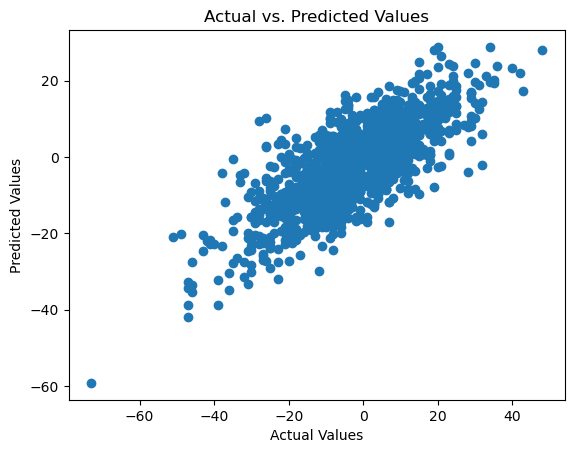

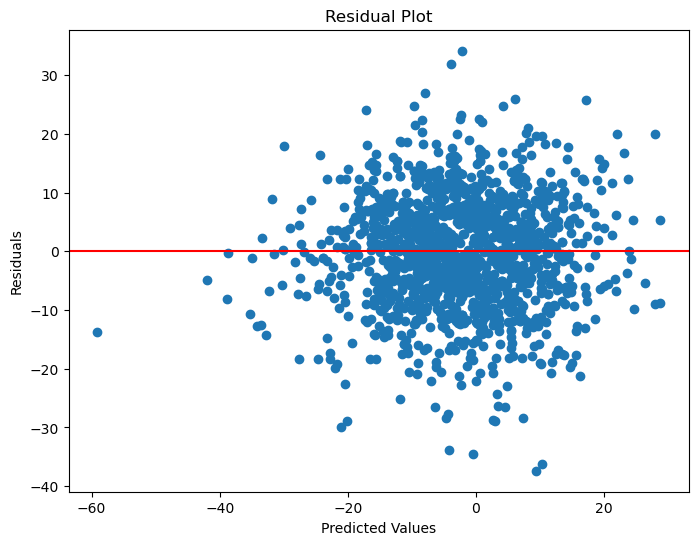

X: ['TEAM2_REB', 'TEAM2_AST', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_AST', 'TEAM1_STL', 'TEAM1_FT_PCT', 'TEAM2_FT_PCT', 'TEAM1_FG_PCT', 'TEAM2_FG_PCT']
y: ['SCORE_DIFF']
Coefficients: 
 [[-0.64318765 -0.73205511 -0.97583878  0.60630827  0.78262313  1.02934449
   0.52514809 -0.5380156   2.4160681  -3.59153228]]
Mean squared error: 76.43589
Root Mean Squared Error: (RMSE): 8.742762027890429
Coefficient of determination: 0.63558


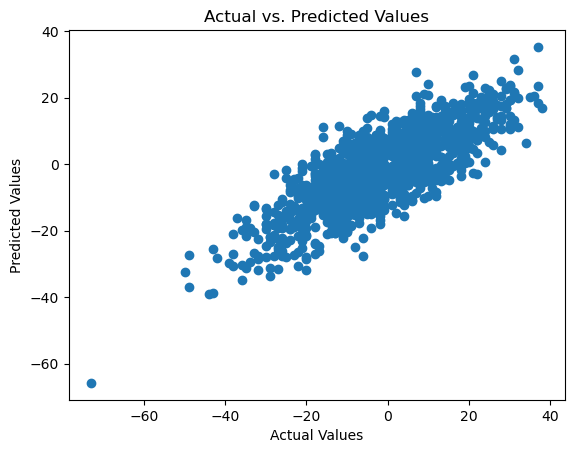

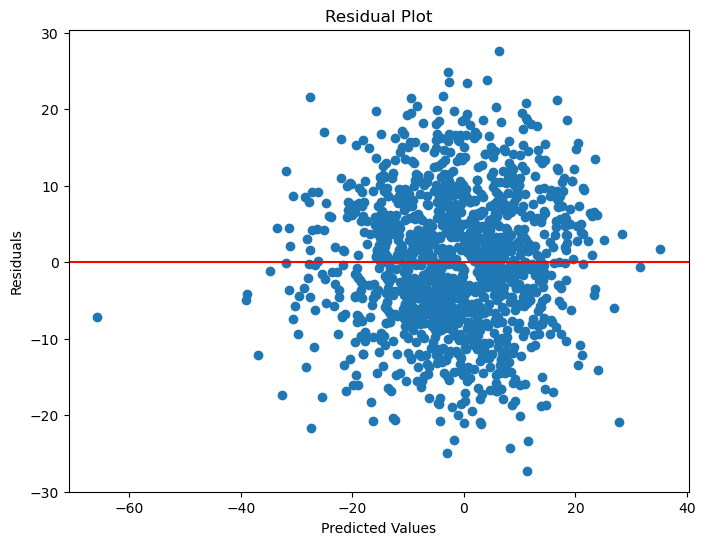

In [174]:
basicLinearRegression(master[['TEAM2_REB', 'TEAM2_AST', 'TEAM2_STL']],
               master[['SCORE_DIFF']])


basicLinearRegression(master[['TEAM2_REB', 'TEAM2_AST', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_AST', 'TEAM1_STL', 'TEAM1_FT_PCT', 'TEAM2_FT_PCT']],
               master[['SCORE_DIFF']])


basicLinearRegression(master[['TEAM2_REB', 'TEAM2_AST', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_AST', 'TEAM1_STL', 'TEAM1_FT_PCT', 'TEAM2_FT_PCT', 'TEAM1_FG_PCT', \
                              'TEAM2_FG_PCT']],
               master[['SCORE_DIFF']])

## Regressions to Determine Away Prob

X: ['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST', 'TEAM1_FG_PCT', 'TEAM2_FG_PCT']
y: ['TEAM1_SCORE_x']
Coefficients: 
 [[ 0.15915852 -0.861266   -0.86161361  0.23391509  0.19341873  0.50213935
   1.06363698  0.39323271  1.89305241  0.24519233]]
Mean squared error: 89.04359
RMSE: 9.436290865192609
Coefficient of determination: 0.44835


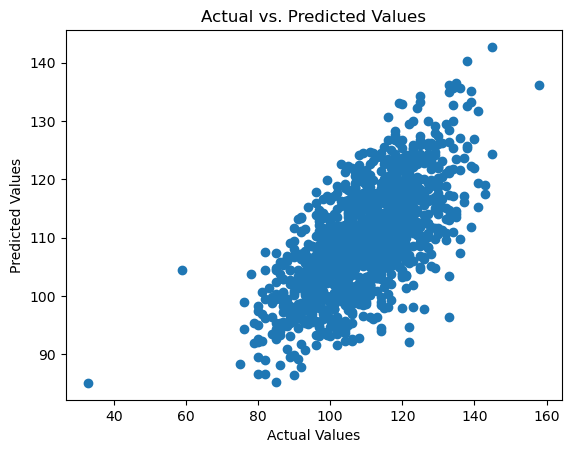

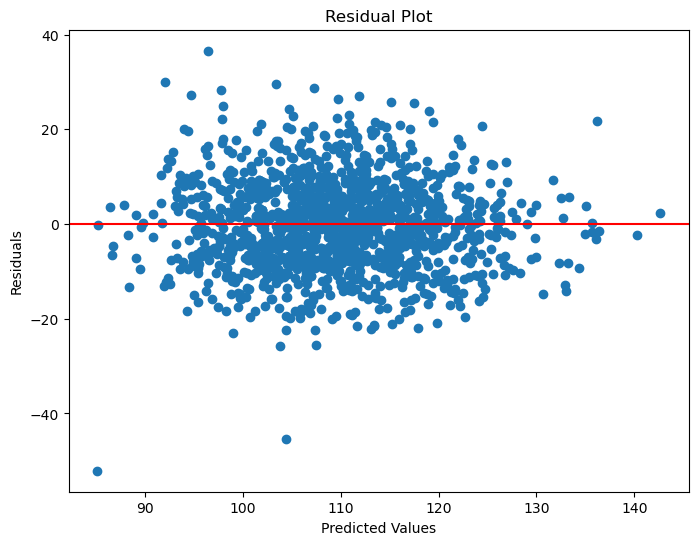

In [165]:
basicLinearRegression(master[['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL']],
               master[['away_prob_x']])


basicLinearRegression(master[['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST']],
               master[['away_prob_x']])


basicLinearRegression(master[['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST', 'TEAM1_FG_PCT', \
                              'TEAM2_FG_PCT']],
               master[['TEAM1_SCORE_x']])

X: ['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL']
y: ['SCORE_DIFF']
Mean squared error: 152.76991
Root Mean Squared Error (RMSE): 12.360012339806756
Coefficient of determination: 0.16510
#################################


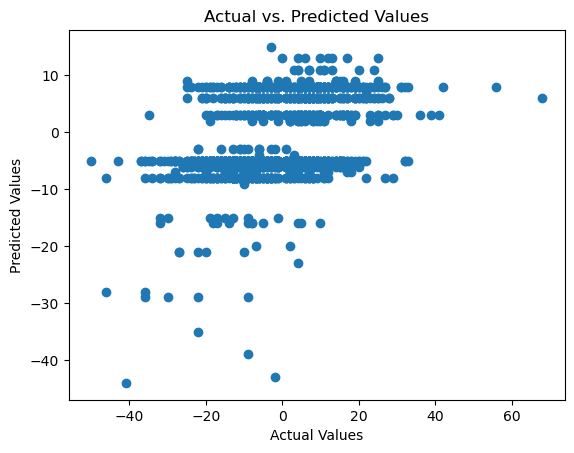

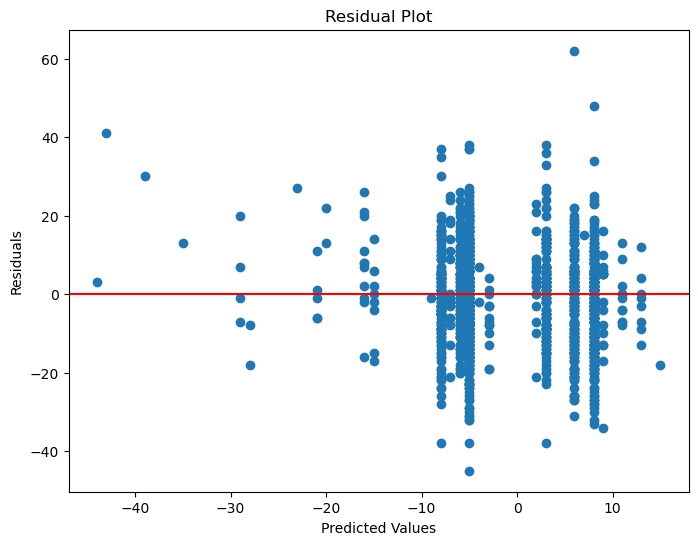

X: ['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST']
y: ['SCORE_DIFF']
Mean squared error: 82.85902
Root Mean Squared Error (RMSE): 9.102693073115534
Coefficient of determination: 0.58879
#################################


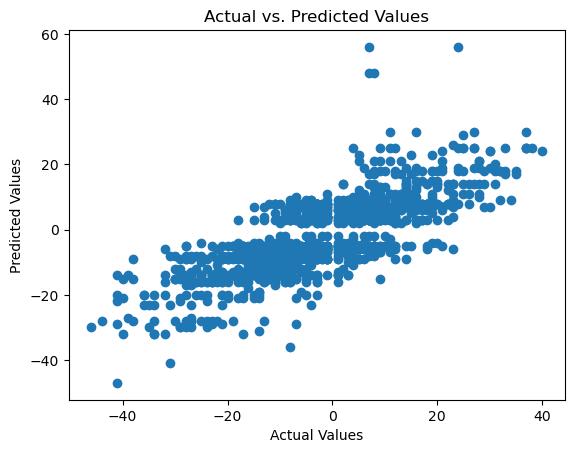

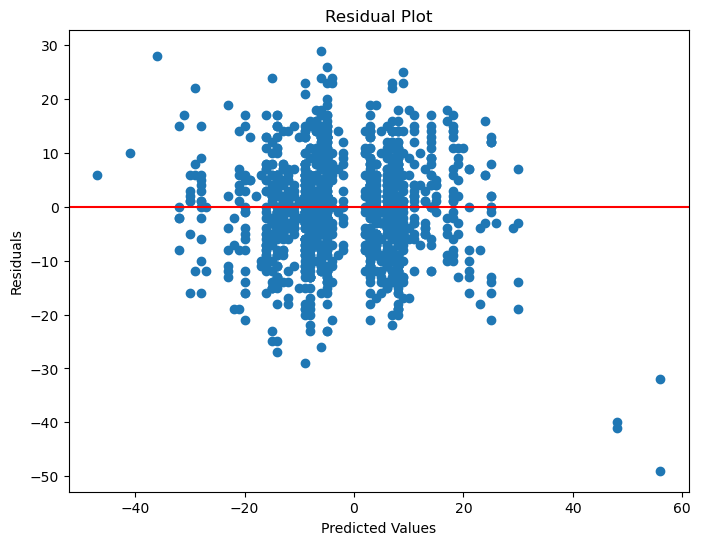

X: ['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST', 'TEAM1_FG_PCT', 'TEAM2_FG_PCT']
y: ['SCORE_DIFF']
Mean squared error: 72.76406
Root Mean Squared Error (RMSE): 8.530185306231978
Coefficient of determination: 0.62710
#################################


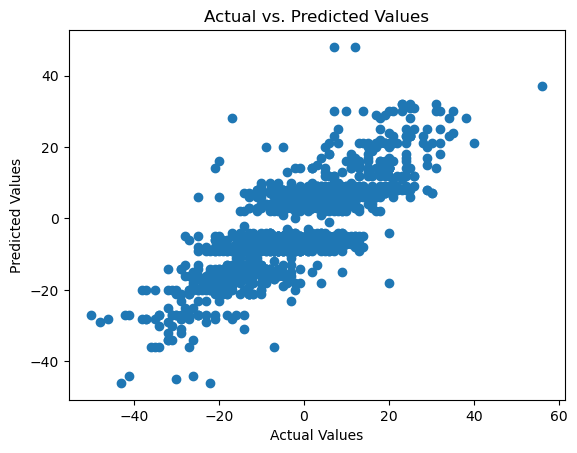

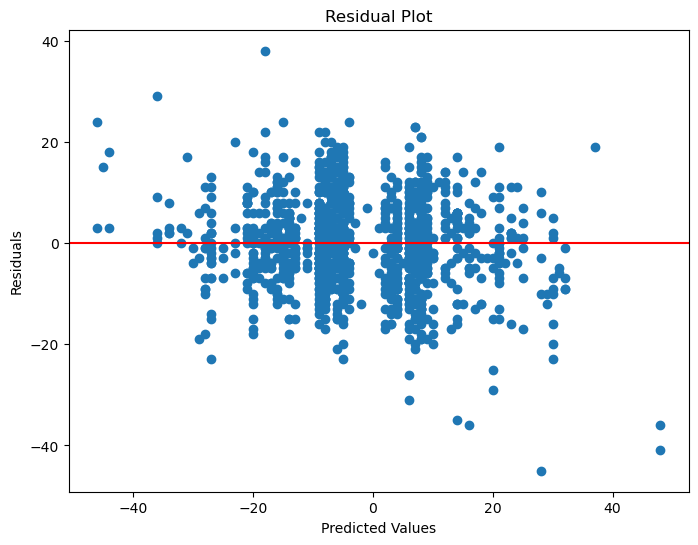

In [169]:
from sklearn.linear_model import LogisticRegression

def basicLogRegression(X_input,y_input):
    X_train, X_test, y_train, y_test = train_test_split(X_input, np.ravel(y_input), test_size=.2)
    X_train = StandardScaler().fit(X_train).transform(X_train)
    X_test = StandardScaler().fit(X_test).transform(X_test)

    print(f"X: {X_input.columns.tolist()}")
    print(f"y: {y_input.columns.tolist()}")

    reg = LogisticRegression(max_iter=500).fit(X_train, np.ravel(y_train))
    y_pred = reg.predict(X_test)

    # The coefficients
    # print("Coefficients: \n", reg.coef_)
    # The mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean squared error: %.5f" % mse)
    #RMSE
    print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse)}')
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.5f" % r2_score(y_test, y_pred))
    print('#################################')


    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

    plt.figure(figsize=(8, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

basicLogRegression(master[['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL']],
               master[['SCORE_DIFF']])


basicLogRegression(master[['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST']],
               master[['SCORE_DIFF']])


basicLogRegression(master[['TEAM2_REB', 'TEAM2_DREB', 'TEAM2_STL', 'TEAM1_REB', 'TEAM1_DREB', 'TEAM1_STL', 'TEAM1_AST', 'TEAM2_AST', 'TEAM1_FG_PCT', \
                              'TEAM2_FG_PCT']],
               master[['SCORE_DIFF']])

